In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [239]:
data = pd.read_csv("renda-preu.csv")
preu21 = data['Preu lloguer'].values.reshape(-1,1)
preu = preu21[:24]
renda21 = data['Renda per capita'].values.reshape(-1,1)
renda = renda21[:24]

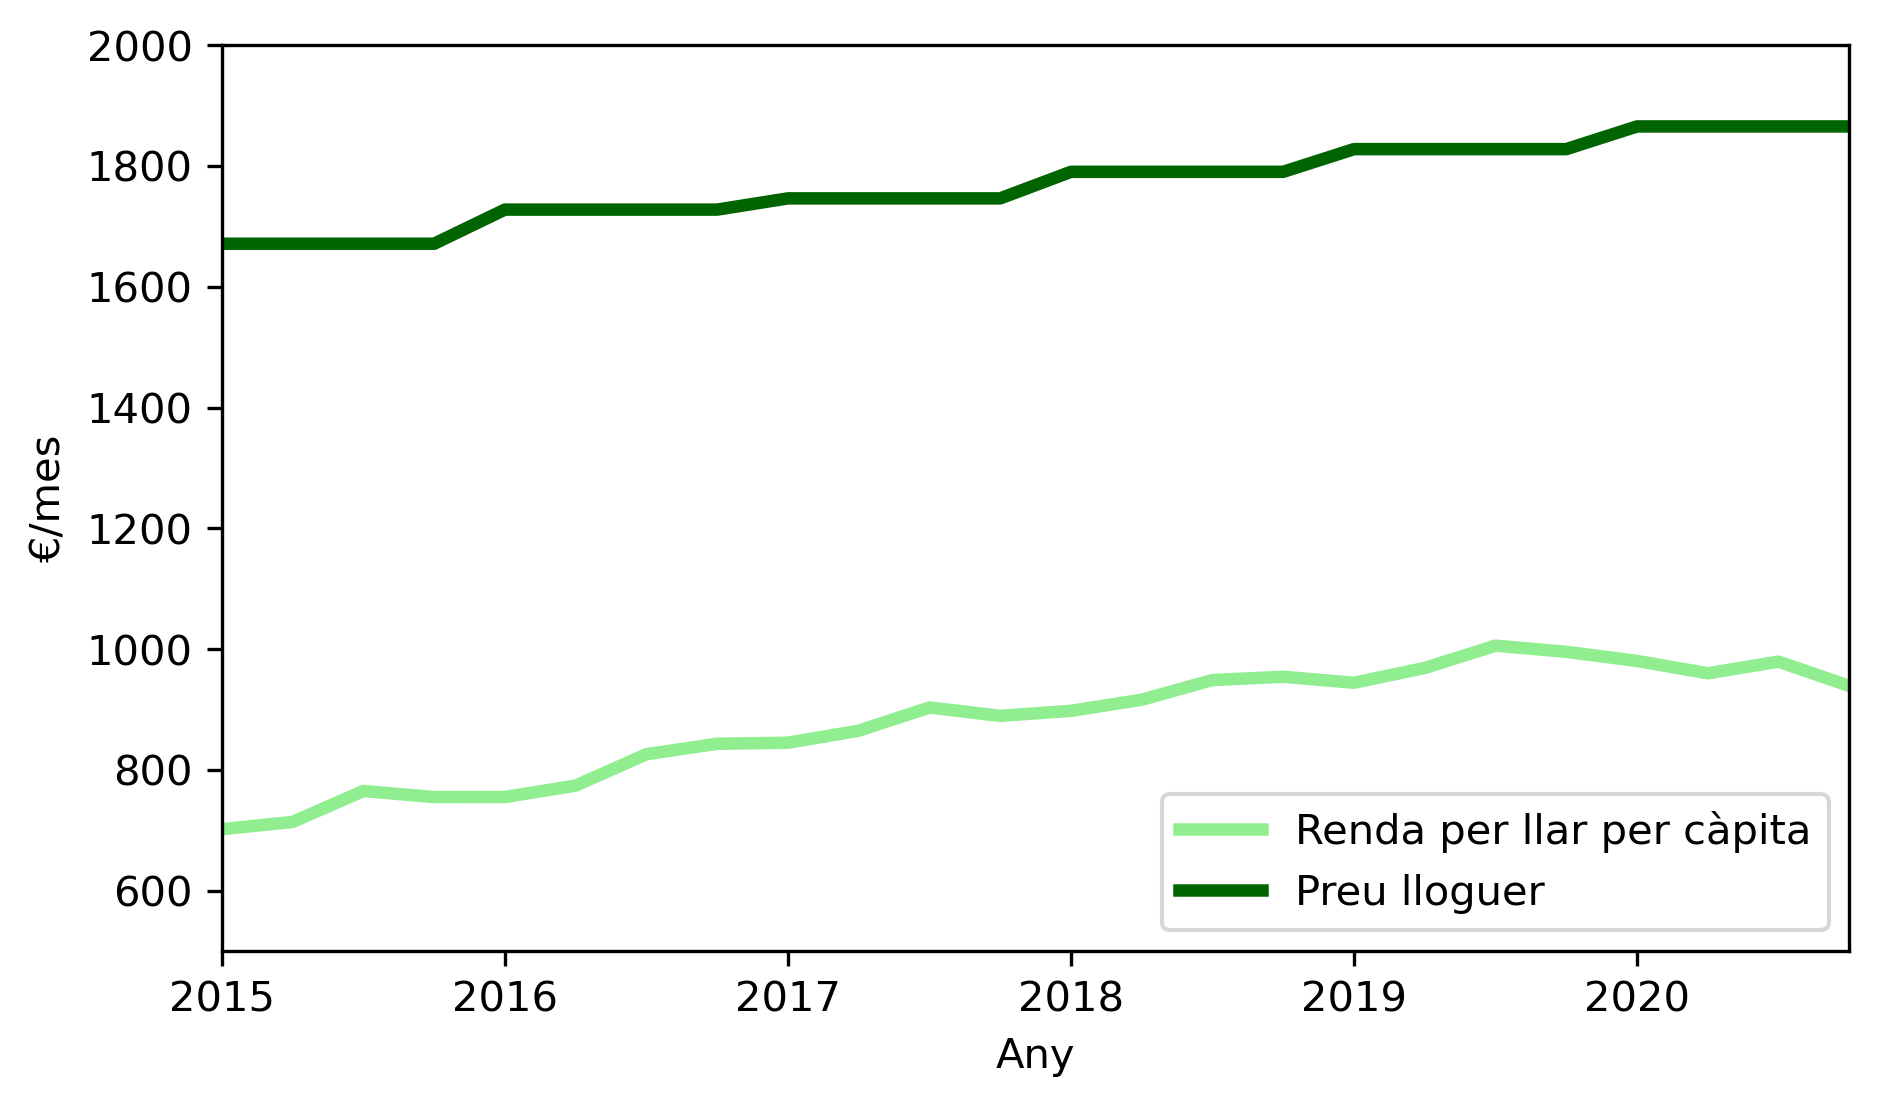

In [327]:
fig = plt.figure(figsize=(7, 4), dpi=300)
x_ticks = [0, 4, 8, 12, 16, 20]
x_labels = [2015, 2016, 2017, 2018, 2019, 2020]
plt.xticks(ticks = x_ticks, labels = x_labels)
plt.xlabel('Any')
plt.ylabel('€/mes')
plt.plot(preu, linewidth=3, color='lightgreen', label='Renda per llar per càpita')
plt.plot(renda, linewidth=3, color='darkgreen', label='Preu lloguer')
plt.ylim(500, 2000)
plt.xlim(0, 23)
plt.legend(loc='lower right')
plt.savefig('Comparació_renda_lloguer.png')
plt.show()

0.7432282493084268


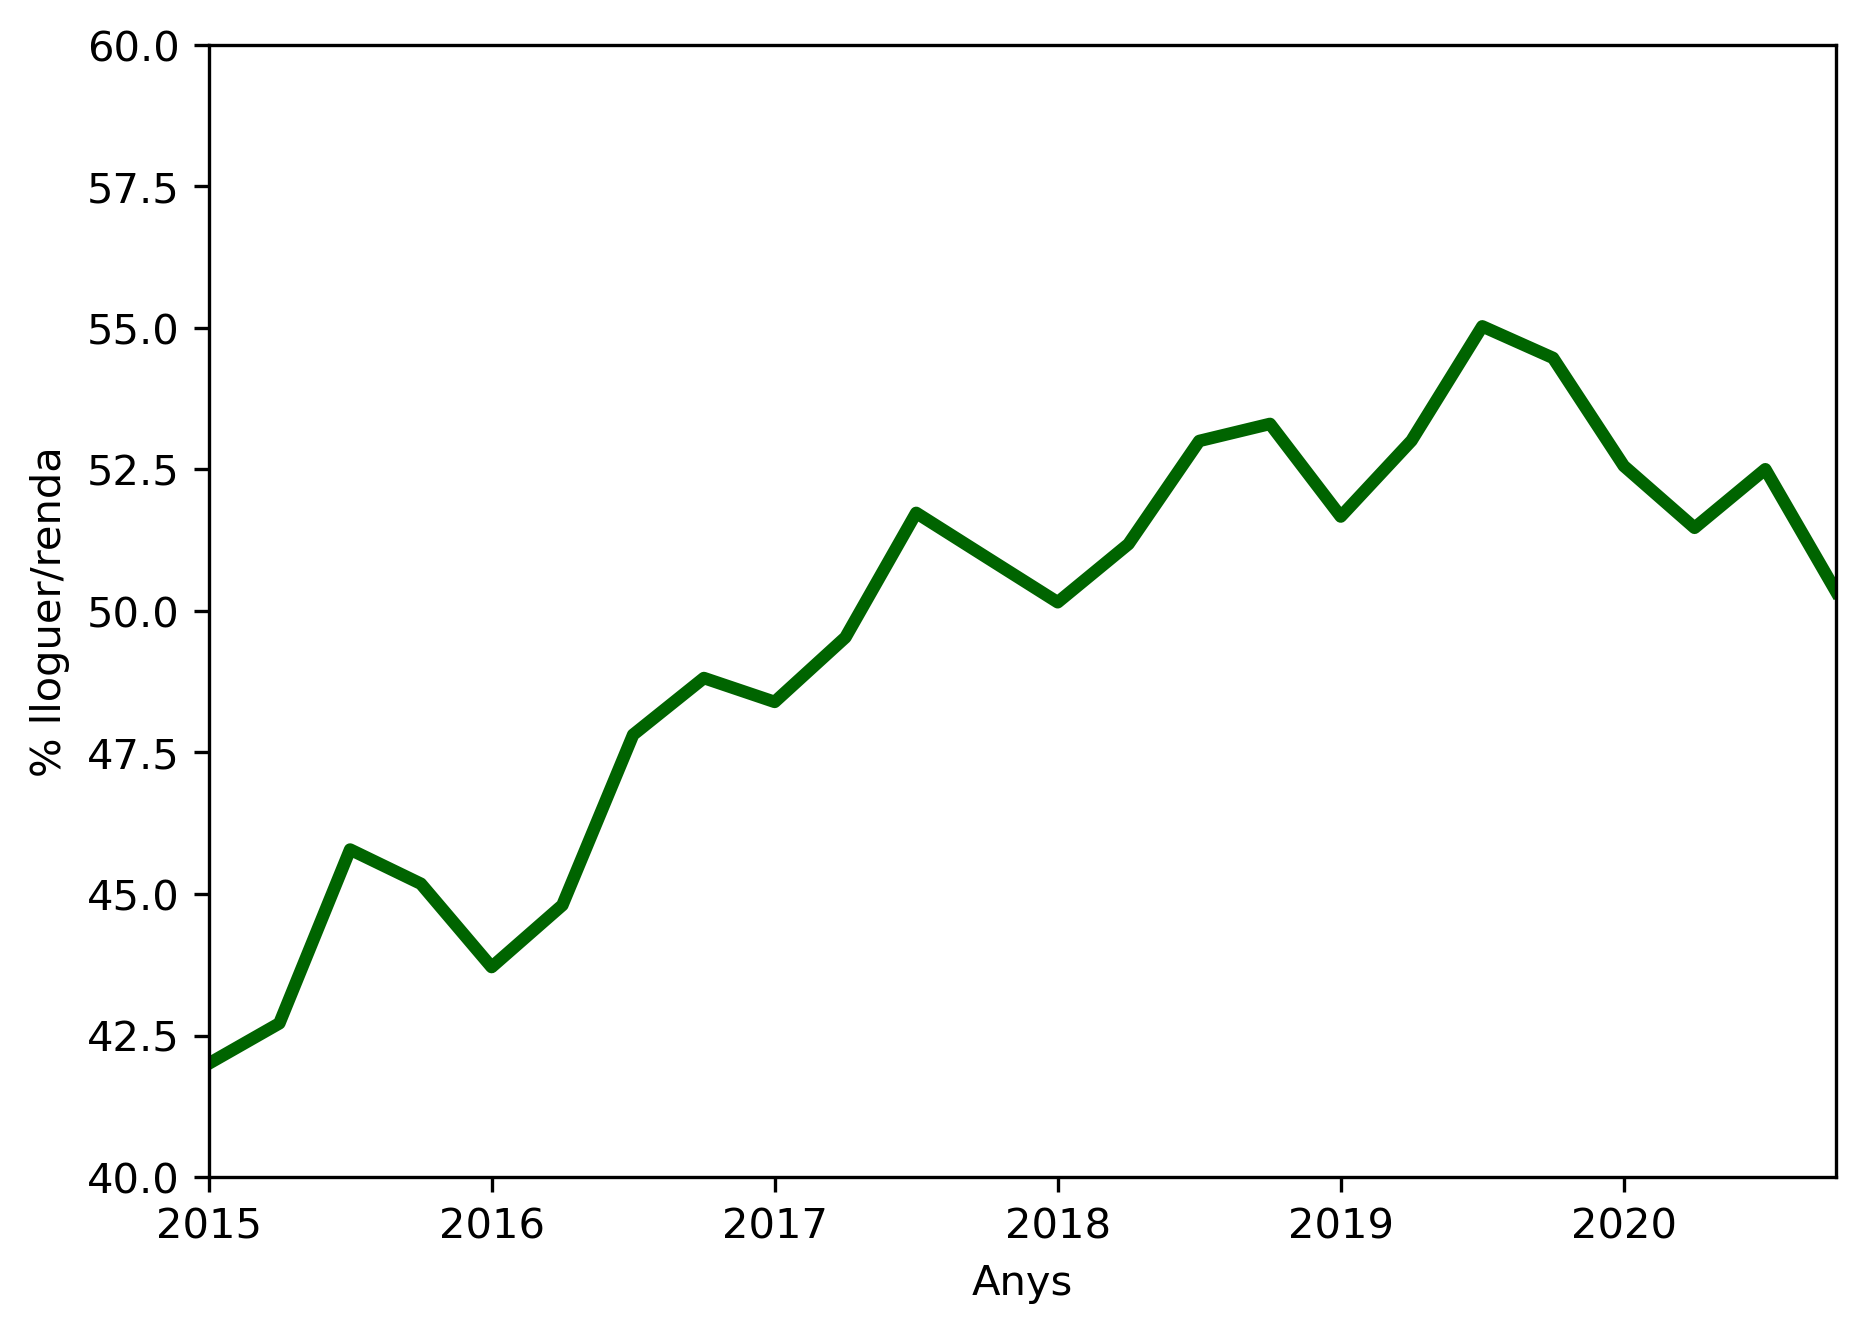

In [325]:
proporcio = (preu/renda)*100
X = np.array(range(0, 24)).reshape(-1,1)
regr = LinearRegression()
regr.fit(X, proporcio)
print(regr.score(X, proporcio))
proporcio_pred = regr.predict(X)

fig = plt.figure(figsize=(7, 5), dpi=300)
x_ticks = [0, 4, 8, 12, 16, 20]
x_labels = [2015, 2016, 2017, 2018, 2019, 2020]
plt.plot(X, proporcio, linewidth=3, color='darkgreen')
plt.xticks(ticks = x_ticks, labels = x_labels)
plt.xlabel('Anys')
plt.ylabel('% lloguer/renda')
plt.ylim(40, 60)
plt.xlim(0, 23)
plt.savefig('Proporcio.png')
plt.show()

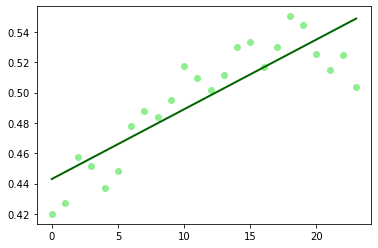

In [269]:
plt.scatter(X, proporcio, color = 'lightgreen')
plt.plot(X, proporcio_pred, color = 'darkgreen', linewidth=2)

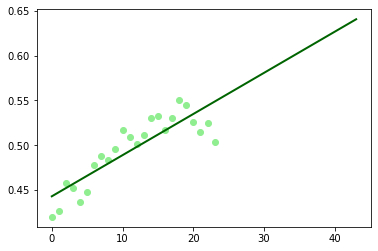

In [271]:
Xfut = np.array(range(0, 44)).reshape(-1,1)
proporcio_predfut = regr.predict(Xfut)
plt.scatter(X, proporcio, color = 'lightgreen')
plt.plot(Xfut, proporcio_predfut, color = 'darkgreen', linewidth=2)